# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(r'C:\Users\lidiv\Downloads/Crimes_-_2001_to_Present.csv',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\lidiv\Downloads/'



<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

In [2]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
##RAW_FILE = r"YOUR FILEPATH HERE")

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

In [3]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\lidiv\\Downloads/Crimes_-_2001_to_Present.csv'

In [4]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [5]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7945416,12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
7945417,12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
7945418,12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
7945419,12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [6]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
2173249,1319931,G001079,01/01/2001 01:00:00 PM,060XX S ARTESIAN AV,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,NaN,08B,1161114.0,1864508.0,2001,09/07/2021 03:41:02 PM,41.783892,-87.684841,"(41.783892488, -87.684841225)",2001-01-01 01:00:00
2175168,1326041,G021012,01/01/2001 01:00:00 AM,048XX W HUTCHINSON ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,NaN,08B,1143134.0,1927772.0,2001,08/17/2015 03:03:40 PM,41.957850,-87.749185,"(41.957850185, -87.749184996)",2001-01-01 01:00:00
2208394,1310717,G001093,01/01/2001 01:00:00 AM,071XX N WOLCOTT AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1162335.0,1947787.0,2001,08/17/2015 03:03:40 PM,42.012391,-87.678032,"(42.0123912, -87.678032389)",2001-01-01 01:00:00
2221591,1427622,G150373,01/01/2001 01:00:00 PM,045XX W SCHUBERT AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,26,1145750.0,1917534.0,2001,08/17/2015 03:03:40 PM,41.929707,-87.739828,"(41.929706879, -87.73982819)",2001-01-01 01:00:00
2165871,1323691,G010990,01/01/2001 01:00:00 AM,025XX W ROOSEVELT RD,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,...,NaN,15,1159886.0,1894673.0,2001,08/17/2015 03:03:40 PM,41.866694,-87.688513,"(41.86669414, -87.688513488)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161372,13285161,JG512780,11/21/2023 12:00:00 AM,016XX N HALSTED ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,7.0,08B,1170717.0,1910915.0,2023,11/28/2023 03:41:41 PM,41.911033,-87.648276,"(41.911033117, -87.648275815)",2023-11-21 12:00:00
161258,13290668,JG520193,11/21/2023 12:00:00 AM,092XX S JEFFERY AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,48.0,05,NaN,NaN,2023,11/28/2023 03:41:41 PM,NaN,NaN,NaN,2023-11-21 12:00:00
160803,13285329,JG514059,11/21/2023 12:00:00 AM,061XX N OVERHILL AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,...,10.0,10,1124056.0,1940258.0,2023,11/28/2023 03:41:41 PM,41.992449,-87.819048,"(41.992448577, -87.819048128)",2023-11-21 12:00:00
160922,13283954,JG512330,11/21/2023 12:00:00 AM,034XX W GRENSHAW ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,29.0,05,1153649.0,1894846.0,2023,11/28/2023 03:41:41 PM,41.867295,-87.711406,"(41.867295145, -87.711405722)",2023-11-21 12:00:00


## Separate the Full Dataset by Years

In [7]:
chicago_full['Datetime'].dt.year

2173249    2001
2175168    2001
2208394    2001
2221591    2001
2165871    2001
           ... 
161372     2023
161258     2023
160803     2023
160922     2023
160728     2023
Name: Datetime, Length: 7945421, dtype: int64

In [8]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486809
2001    485898
2003    475987
2004    469427
2005    453774
2006    448179
2007    437090
2008    427187
2009    392829
2010    370518
2011    351998
2012    336327
2013    307544
2014    275805
2016    269850
2017    269115
2018    268931
2015    264810
2019    261389
2022    239056
2023    231679
2020    212255
2021    208964
Name: Year, dtype: int64

In [9]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [10]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,2001,41.783892,-87.684841
2001-01-01 01:00:00,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,2001,41.957850,-87.749185
2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,2001,42.012391,-87.678032
2001-01-01 01:00:00,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,2001,41.929707,-87.739828
2001-01-01 01:00:00,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,2001,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21 12:00:00,13285161,11/21/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1813,18.0,43.0,2023,41.911033,-87.648276
2023-11-21 12:00:00,13290668,11/21/2023 12:00:00 AM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,413,4.0,8.0,2023,NaN,NaN
2023-11-21 12:00:00,13285329,11/21/2023 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1612,16.0,41.0,2023,41.992449,-87.819048


In [11]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [12]:
FINAL_DROP = ['Year']

In [13]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [14]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [15]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [16]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f,) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
1,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
3,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
4,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...,...
231674,13285161,11/21/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1813,18.0,43.0,41.911033,-87.648276
231675,13290668,11/21/2023 12:00:00 AM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,413,4.0,8.0,NaN,NaN
231676,13285329,11/21/2023 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1612,16.0,41.0,41.992449,-87.819048
231677,13283954,11/21/2023 12:00:00 AM,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,1133,11.0,24.0,41.867295,-87.711406


In [17]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485898
2002    486809
2003    475987
2004    469427
2005    453774
2006    448179
2007    437090
2008    427187
2009    392829
2010    370518
2011    351998
2012    336327
2013    307544
2014    275805
2015    264810
2016    269850
2017    269115
2018    268931
2019    261389
2020    212255
2021    208964
2022    239056
2023    231679
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config

from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs

import statsmodels.tsa.api as tsa

## Topic 1) How do crime rates differ between police districts?
- Which district has the most crimes? Which has the least?

In [19]:
df1 = df.set_index('ID')
df1

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...
13285161,11/21/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1813,18.0,43.0,41.911033,-87.648276
13290668,11/21/2023 12:00:00 AM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,413,4.0,8.0,NaN,NaN
13285329,11/21/2023 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1612,16.0,41.0,41.992449,-87.819048


In [20]:
district_crime_counts = df1.groupby('District').size().sort_values(ascending=False)
district_crime_counts

District
8.0     533562
11.0    508624
6.0     464764
7.0     457002
25.0    451522
4.0     451121
3.0     402793
12.0    395302
9.0     387605
2.0     376797
19.0    358071
18.0    357387
5.0     351397
10.0    342245
15.0    338783
1.0     323406
14.0    306965
16.0    266474
22.0    260062
24.0    240841
17.0    229371
20.0    141027
31.0       249
21.0         4
dtype: int64

In [21]:
max_district_crime_counts_value = district_crime_counts.max()
max_district_crime_counts_value

533562

In [22]:
max_district_crime_counts_id = district_crime_counts.idxmax()
max_district_crime_counts_id

8.0

In [23]:
min_district_crime_counts_value = district_crime_counts.min()
min_district_crime_counts_value

4

In [24]:
min_district_crime_counts_id = district_crime_counts.idxmin()
min_district_crime_counts_id

21.0

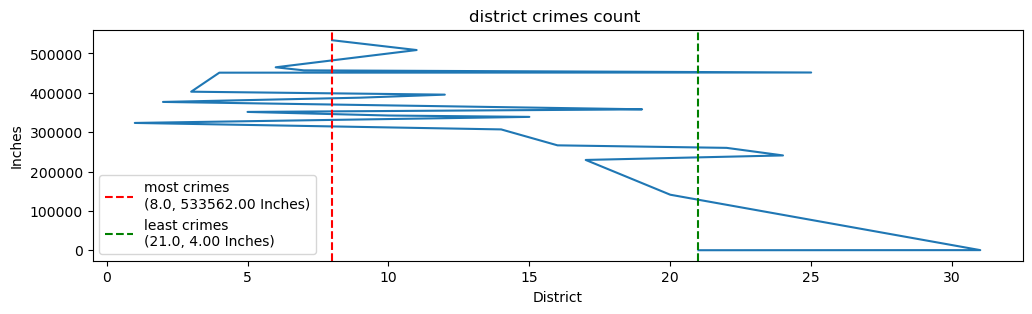

In [25]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 3))
district_crime_counts.plot(ax=ax, title="district crimes count ", ylabel="Inches")



# Add a vertical line at the date of max and min
ax.axvline(x=max_district_crime_counts_id, color='red', linestyle='--', label=f'most crimes\n({max_district_crime_counts_id}, {max_district_crime_counts_value:.2f} Inches)')

ax.axvline(x=min_district_crime_counts_id, color='green', linestyle='--', label=f'least crimes\n({min_district_crime_counts_id}, {min_district_crime_counts_value:.2f} Inches)')
ax.legend()


# Show the plot

plt.show()

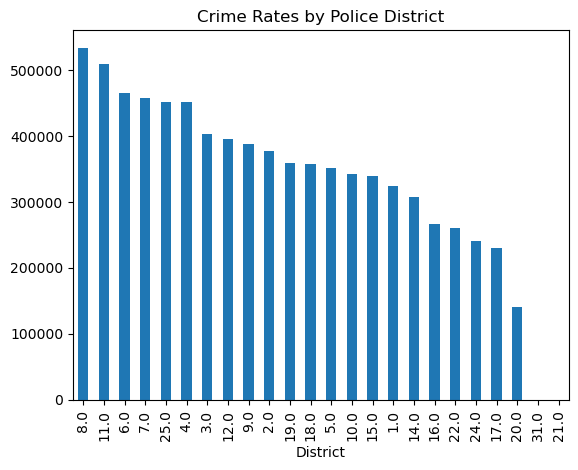

In [26]:
district_crime_counts.plot(kind='bar', title='Crime Rates by Police District');


## Topic 2: Crime Rates Over 20 Years

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Date']

0        2001-01-01 13:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 13:00:00
4        2001-01-01 01:00:00
                 ...        
231674   2023-11-21 00:00:00
231675   2023-11-21 00:00:00
231676   2023-11-21 00:00:00
231677   2023-11-21 00:00:00
231678   2023-11-21 00:00:00
Name: Date, Length: 7945421, dtype: datetime64[ns]

In [28]:
df2 = df.set_index('Date')
df2

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 13:00:00,1427622,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
2001-01-01 01:00:00,1323691,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21 00:00:00,13285161,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1813,18.0,43.0,41.911033,-87.648276
2023-11-21 00:00:00,13290668,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,413,4.0,8.0,NaN,NaN
2023-11-21 00:00:00,13285329,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1612,16.0,41.0,41.992449,-87.819048


In [29]:
# Calculate and visualize total number of crimes over 20 years
total_crimes_by_year = df.groupby('Date').size()

total_crimes_by_year

Date
2001-01-01 00:00:00    194
2001-01-01 00:01:00    142
2001-01-01 00:04:00      1
2001-01-01 00:05:00     13
2001-01-01 00:07:00      1
                      ... 
2023-11-20 23:17:00      1
2023-11-20 23:18:00      2
2023-11-20 23:51:00      1
2023-11-20 23:53:00      1
2023-11-21 00:00:00     15
Length: 3282360, dtype: int64

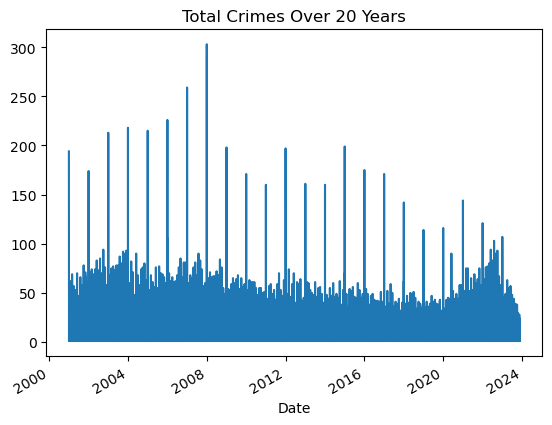

In [30]:
total_crimes_by_year.plot(kind='line', title='Total Crimes Over 20 Years');

### Topic 3) How did the COVID-19 Pandemic affect overall crime trends in Chicago?

In [31]:
# Resample data on a daily basis
daily_data = df2.resample('D').size()

daily_data

Date
2001-01-01    1826
2001-01-02    1143
2001-01-03    1151
2001-01-04    1166
2001-01-05    1267
              ... 
2023-11-17     724
2023-11-18     650
2023-11-19     673
2023-11-20     612
2023-11-21      15
Freq: D, Length: 8360, dtype: int64

In [32]:
# Create subsets for periods before, during, and after the pandemic
pre_pandemic = daily_data['2018-01-01':'2019-12-31']
pre_pandemic



Date
2018-01-01    1001
2018-01-02     562
2018-01-03     576
2018-01-04     602
2018-01-05     666
              ... 
2019-12-27     695
2019-12-28     640
2019-12-29     689
2019-12-30     617
2019-12-31     551
Freq: D, Length: 730, dtype: int64

In [33]:
pandemic = daily_data['2020-01-01':'2021-12-31']
pandemic

Date
2020-01-01    1014
2020-01-02     637
2020-01-03     700
2020-01-04     638
2020-01-05     625
              ... 
2021-12-27     512
2021-12-28     459
2021-12-29     500
2021-12-30     552
2021-12-31     606
Freq: D, Length: 731, dtype: int64

In [34]:
post_pandemic = daily_data['2022-01-01':]
post_pandemic

Date
2022-01-01    773
2022-01-02    407
2022-01-03    423
2022-01-04    474
2022-01-05    419
             ... 
2023-11-17    724
2023-11-18    650
2023-11-19    673
2023-11-20    612
2023-11-21     15
Freq: D, Length: 690, dtype: int64

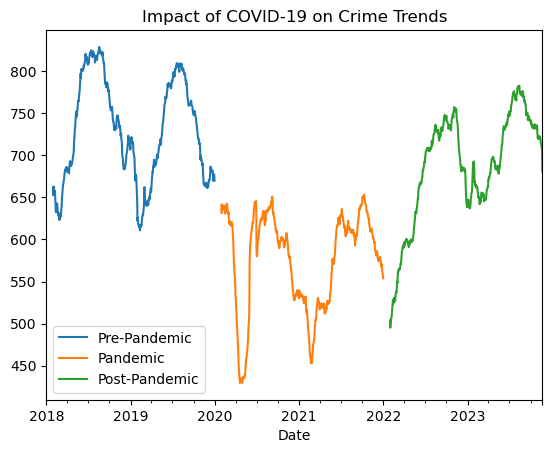

In [35]:
# Plot overall crime trends for the three periods with rolling means
# Add xticks for better visualization
pre_pandemic.rolling(window=30).mean().plot(label='Pre-Pandemic')
pandemic.rolling(window=30).mean().plot(label='Pandemic')
post_pandemic.rolling(window=30).mean().plot(label='Post-Pandemic')
plt.legend()
plt.title('Impact of COVID-19 on Crime Trends')
plt.show()

### Topic 4) What are the seasonal cycles of Crime in Chicago?

#### monthly

In [36]:
# Resample data into monthly, daily, and hourly versions
monthly_data = df2.resample('M').size()
monthly_data 

Date
2001-01-31    38120
2001-02-28    33788
2001-03-31    40568
2001-04-30    40091
2001-05-31    41839
              ...  
2023-07-31    23817
2023-08-31    23940
2023-09-30    22267
2023-10-31    22531
2023-11-30    13870
Freq: M, Length: 275, dtype: int64

In [37]:

from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
# Decompose data
decomposition = seasonal_decompose(monthly_data)


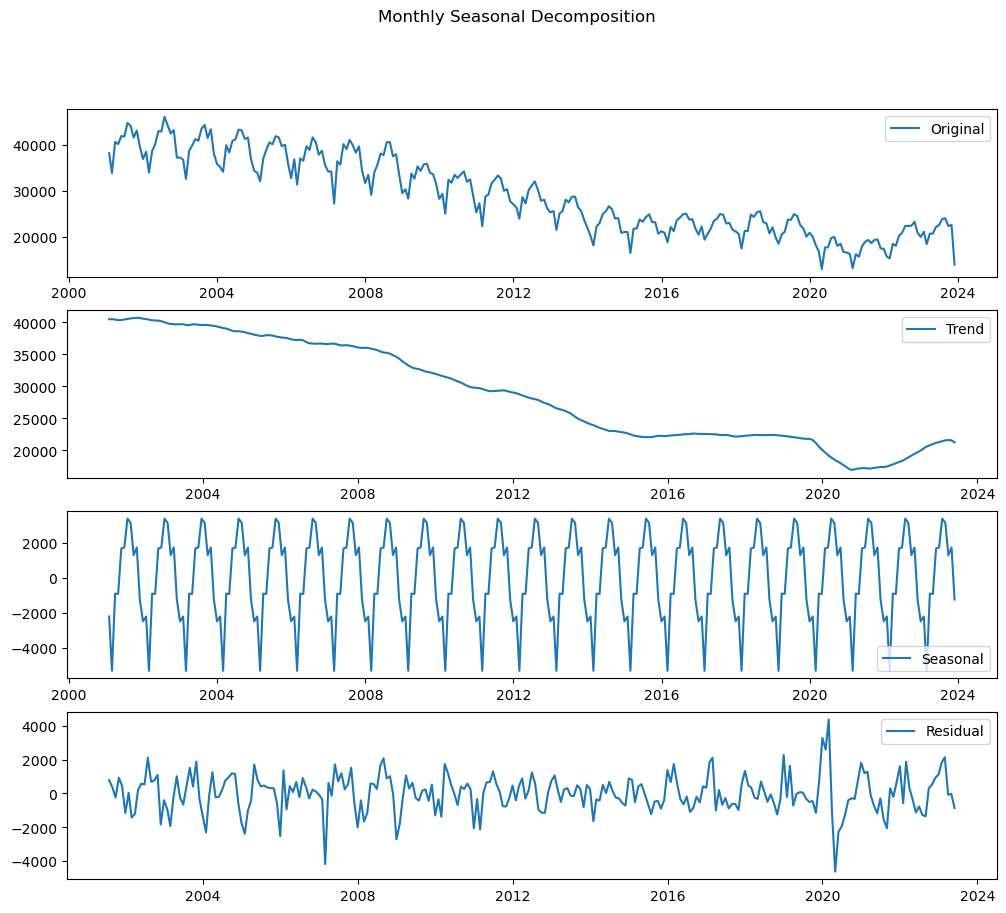

In [39]:
# Create subplots with a larger figure size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Plot original data
ax1.plot(monthly_data, label='Original')
ax1.legend()

# Plot trend component
ax2.plot(decomposition.trend, label='Trend')
ax2.legend()

# Plot seasonal component
ax3.plot(decomposition.seasonal, label='Seasonal')
ax3.legend()

# Plot residual component
ax4.plot(decomposition.resid, label='Residual')
ax4.legend()

plt.suptitle('Monthly Seasonal Decomposition')
plt.show()

In [40]:
# Seasonal period
seasonal_period_index = decomposition.seasonal.idxmax()
seasonal_period = seasonal_period_index.strftime("%B %Y")
print(f"Seasonal Period: {seasonal_period}")


Seasonal Period: July 2001


In [41]:
# Describe the cycle
cycle_description = "Crimes are most common during [specify high-crime months] and least common during [specify low-crime months]."
print(f"Cycle Description: {cycle_description}")



Cycle Description: Crimes are most common during [specify high-crime months] and least common during [specify low-crime months].


In [42]:
# Counts variation
max_variation = decomposition.seasonal.max()
min_variation = decomposition.seasonal.min()
print(f"Counts Variation: Highest Peak : {max_variation}, Lowest Peak : {min_variation}")

Counts Variation: Highest Peak : 3407.536811568062, Lowest Peak : -5327.927203583453


#### Daily

In [43]:
daily_data = df2.resample('D').size()

daily_data

Date
2001-01-01    1826
2001-01-02    1143
2001-01-03    1151
2001-01-04    1166
2001-01-05    1267
              ... 
2023-11-17     724
2023-11-18     650
2023-11-19     673
2023-11-20     612
2023-11-21      15
Freq: D, Length: 8360, dtype: int64

In [44]:
# Decompose daily data
daily_decomposition = seasonal_decompose(daily_data)

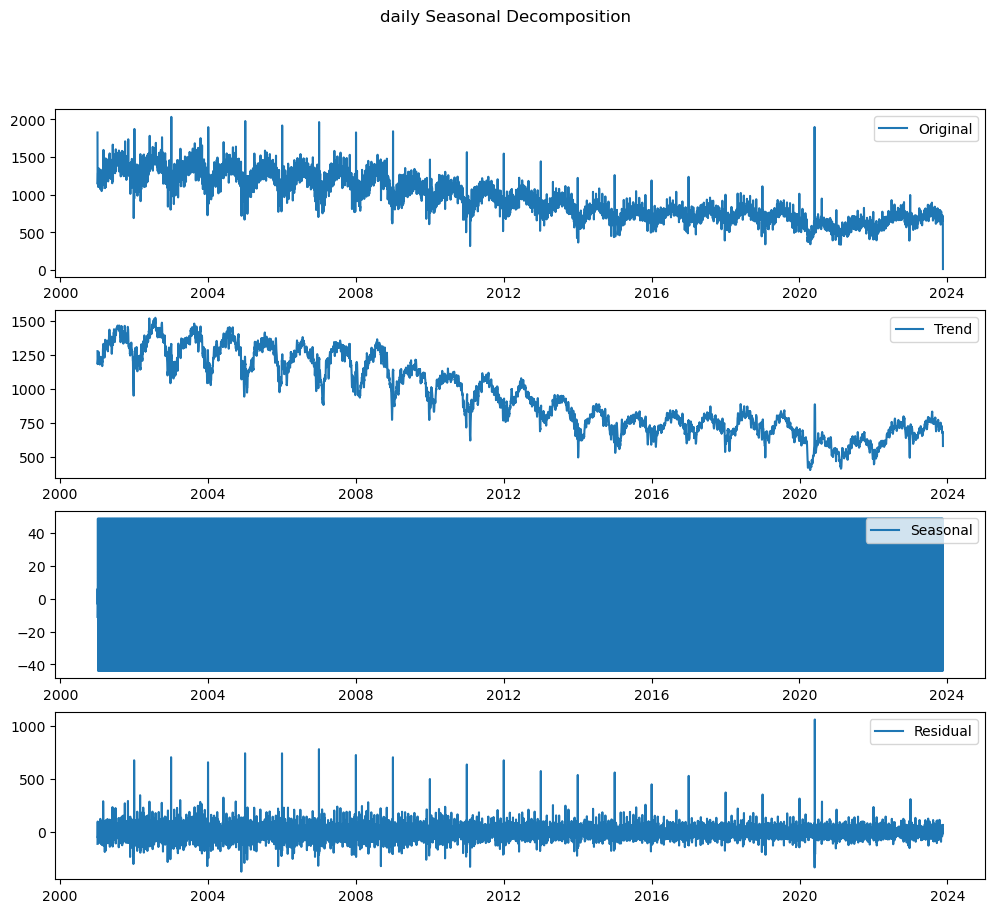

In [45]:
# Create subplots with a larger figure size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Plot original data
ax1.plot(daily_data, label='Original')
ax1.legend()

# Plot trend component
ax2.plot(daily_decomposition.trend, label='Trend')
ax2.legend()

# Plot seasonal component
ax3.plot(daily_decomposition.seasonal, label='Seasonal')
ax3.legend()

# Plot residual component
ax4.plot(daily_decomposition.resid, label='Residual')
ax4.legend()

plt.suptitle('daily Seasonal Decomposition')
plt.show()

In [46]:
# Seasonal period
daily_seasonal_period_index = daily_decomposition.seasonal.idxmax()
daily_seasonal_period = daily_seasonal_period_index.strftime("%B %d, %Y")
print(f"Daily Seasonal Period: {daily_seasonal_period}")


Daily Seasonal Period: January 05, 2001


In [47]:
# Describe the cycle
daily_cycle_description = "Crimes are most common during [specify high-crime days] and least common during [specify low-crime days]."
print(f"Daily Cycle Description: {daily_cycle_description}")


Daily Cycle Description: Crimes are most common during [specify high-crime days] and least common during [specify low-crime days].


In [48]:
# Counts variation
daily_max_variation = daily_decomposition.seasonal.max()
daily_min_variation = daily_decomposition.seasonal.min()
print(f"Daily Counts Variation: Highest Peak : {daily_max_variation}, Lowest Peak : {daily_min_variation}")


Daily Counts Variation: Highest Peak : 48.86972111585751, Lowest Peak : -43.94465802849718


#### hourly

In [49]:
hourly_data = df2.resample('H').size()
hourly_data

Date
2001-01-01 00:00:00    419
2001-01-01 01:00:00     91
2001-01-01 02:00:00     78
2001-01-01 03:00:00     71
2001-01-01 04:00:00     53
                      ... 
2023-11-20 20:00:00     37
2023-11-20 21:00:00     22
2023-11-20 22:00:00     24
2023-11-20 23:00:00     13
2023-11-21 00:00:00     15
Freq: H, Length: 200617, dtype: int64

In [50]:
# Decompose hourly data
hourly_decomposition = seasonal_decompose(hourly_data)
hourly_decomposition

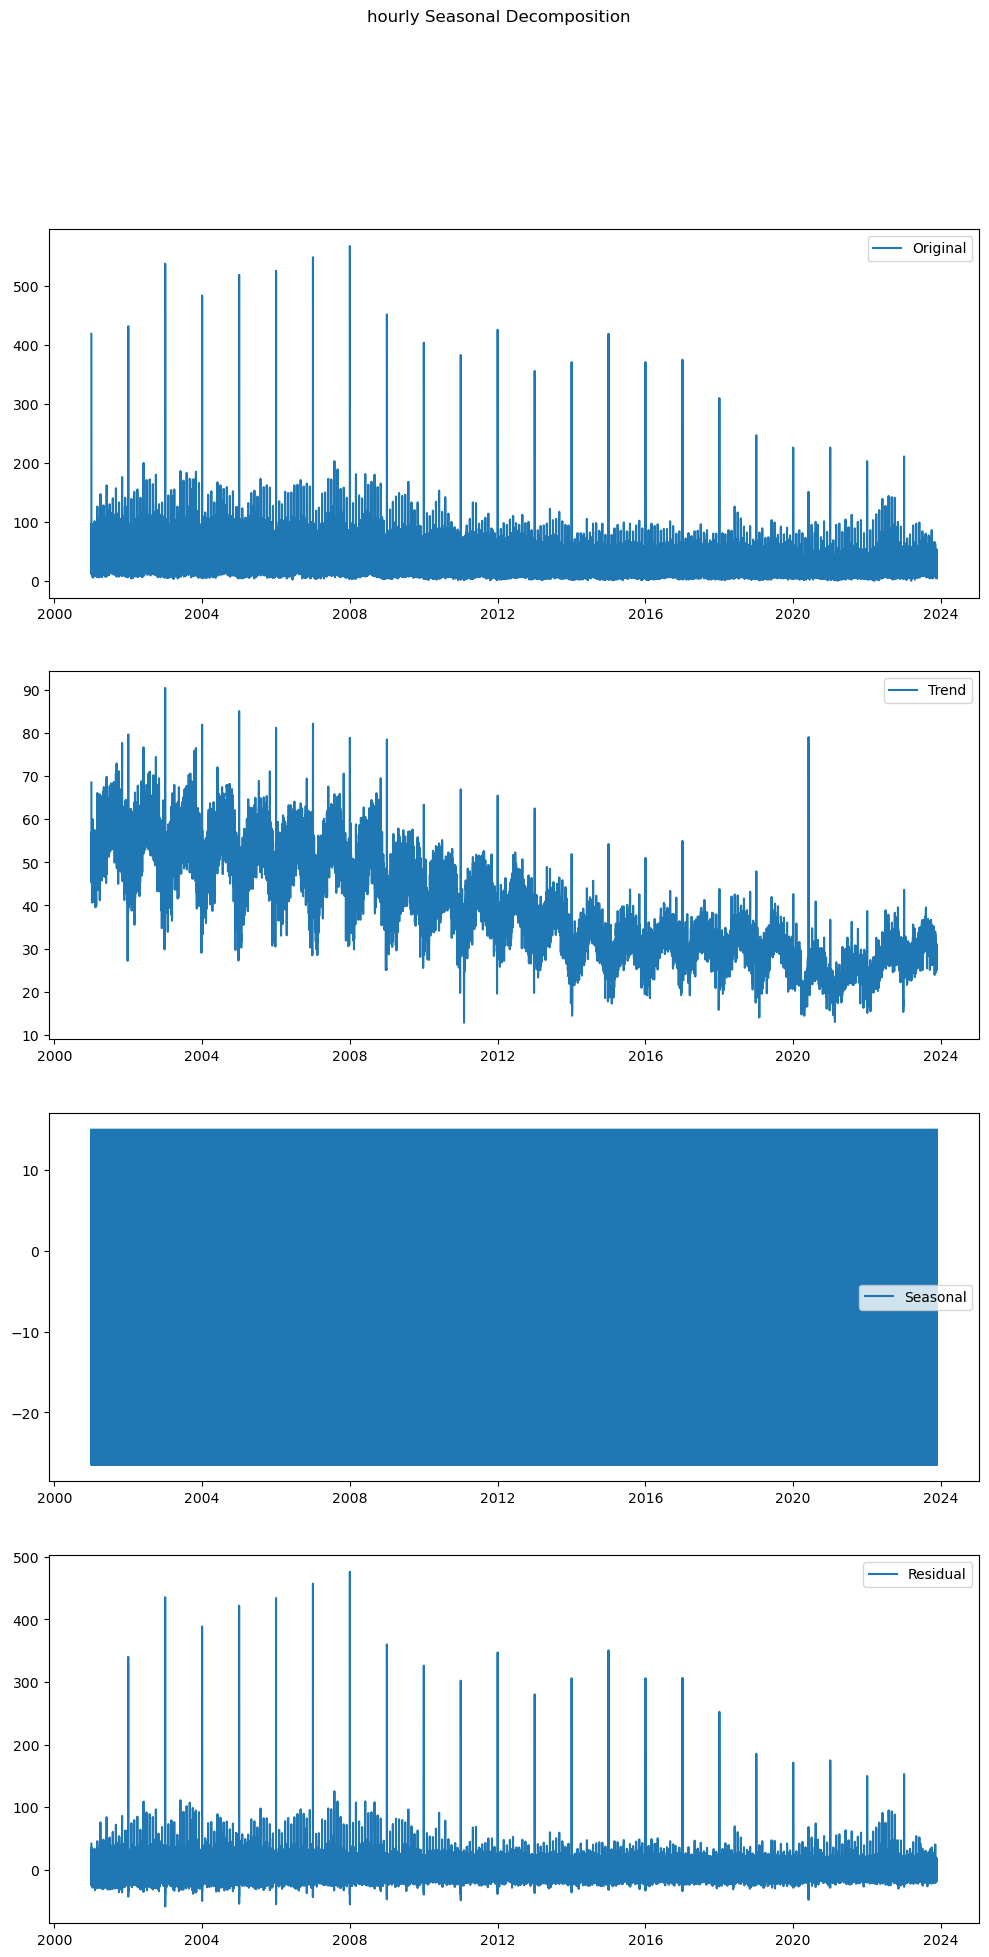

In [51]:
# Create subplots with a larger figure size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 22))

# Plot original data
ax1.plot(hourly_data, label='Original')
ax1.legend()

# Plot trend component
ax2.plot(hourly_decomposition.trend, label='Trend')
ax2.legend()

# Plot seasonal component
ax3.plot(hourly_decomposition.seasonal, label='Seasonal')
ax3.legend()

# Plot residual component
ax4.plot(hourly_decomposition.resid, label='Residual')
ax4.legend()

plt.suptitle('hourly Seasonal Decomposition')
plt.show()

In [52]:
# Seasonal period
hourly_seasonal_period_index = hourly_decomposition.seasonal.idxmax()
hourly_seasonal_period = hourly_seasonal_period_index.strftime("%H:%M")
print(f"Hourly Seasonal Period: {hourly_seasonal_period}")


Hourly Seasonal Period: 00:00


In [53]:
# Describe the cycle
hourly_cycle_description = "Crimes are most common during [specify high-crime hours] and least common during [specify low-crime hours]."
print(f"Hourly Cycle Description: {hourly_cycle_description}")

Hourly Cycle Description: Crimes are most common during [specify high-crime hours] and least common during [specify low-crime hours].


In [54]:
# Counts variation
hourly_max_variation = hourly_decomposition.seasonal.max()
hourly_min_variation = hourly_decomposition.seasonal.min()
print(f"Hourly Counts Variation: Highest Peak : {hourly_max_variation}, Lowest Peak : {hourly_min_variation}")

Hourly Counts Variation: Highest Peak : 14.939548592810313, Lowest Peak : -26.463366279168625


# PART 2

In [55]:
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
1,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
3,1427622,2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
4,1323691,2001-01-01 01:00:00,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...,...
231674,13285161,2023-11-21 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1813,18.0,43.0,41.911033,-87.648276
231675,13290668,2023-11-21 00:00:00,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,413,4.0,8.0,NaN,NaN
231676,13285329,2023-11-21 00:00:00,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1612,16.0,41.0,41.992449,-87.819048
231677,13283954,2023-11-21 00:00:00,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,1133,11.0,24.0,41.867295,-87.711406


In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [57]:
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 13:00:00,1427622,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
2001-01-01 01:00:00,1323691,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21 00:00:00,13285161,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1813,18.0,43.0,41.911033,-87.648276
2023-11-21 00:00:00,13290668,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,413,4.0,8.0,NaN,NaN
2023-11-21 00:00:00,13285329,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1612,16.0,41.0,41.992449,-87.819048


### THEFT

In [58]:
# perform resampling
theft_data = df[df['Primary Type'] == 'THEFT'].resample('M').size()

In [59]:
theft_data

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2023-07-31    5167
2023-08-31    5382
2023-09-30    4877
2023-10-31    5097
2023-11-30    3004
Freq: M, Length: 275, dtype: int64

In [60]:
# Check for null values
print(theft_data.isnull().sum())

# If null values exist, fill or interpolate them
theft_data = theft_data.fillna(method='ffill')

0


In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series
theft_decomposition = seasonal_decompose(theft_data)
theft_decomposition

In [62]:
# plot_acf and plot_pacf are from statsmodels.graphics.tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

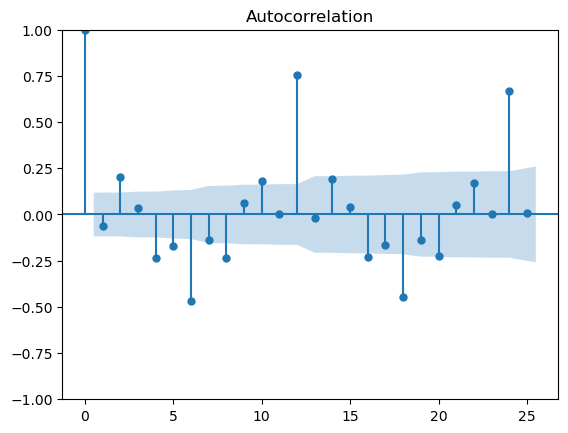

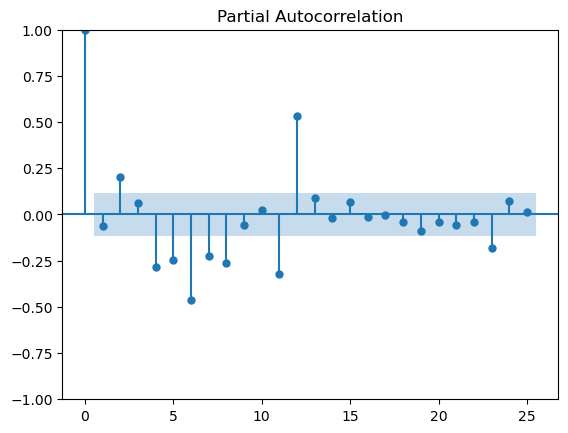

In [63]:
# Plot ACF and PACF
plot_acf(theft_data.diff().dropna())
plot_pacf(theft_data.diff().dropna())
plt.show()

In [64]:
train_theft = theft_data.iloc[:-6]
train_theft

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2023-01-31    4302
2023-02-28    3821
2023-03-31    4461
2023-04-30    4360
2023-05-31    4726
Freq: M, Length: 269, dtype: int64

In [65]:
test_theft = theft_data.iloc[-6:]
test_theft

Date
2023-06-30    5062
2023-07-31    5167
2023-08-31    5382
2023-09-30    4877
2023-10-31    5097
2023-11-30    3004
Freq: M, dtype: int64

### BATTERY

In [66]:
battery_data =df[df['Primary Type'] == 'BATTERY'].resample('M').size()
battery_data

Date
2001-01-31    6527
2001-02-28    6042
2001-03-31    7662
2001-04-30    8328
2001-05-31    8887
              ... 
2023-07-31    4208
2023-08-31    4048
2023-09-30    3955
2023-10-31    3825
2023-11-30    2369
Freq: M, Length: 275, dtype: int64

In [67]:
# Check for null values
print(battery_data.isnull().sum())

# If null values exist, fill or interpolate them
battery_data = battery_data.fillna(method='ffill')

0


In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series
battery_decomposition = seasonal_decompose(battery_data)
theft_decomposition

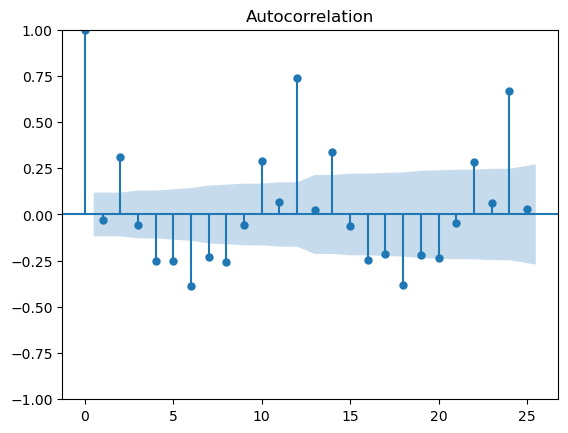

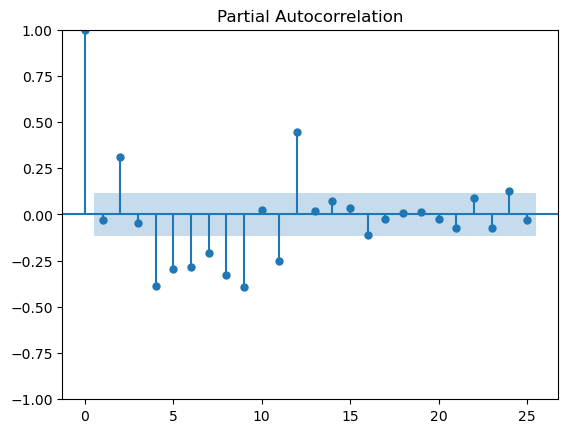

In [69]:
# Plot ACF and PACF
plot_acf(battery_data.diff().dropna())
plot_pacf(battery_data.diff().dropna())
plt.show()

In [70]:
train_battery = battery_data.iloc[:-6]
train_battery

Date
2001-01-31    6527
2001-02-28    6042
2001-03-31    7662
2001-04-30    8328
2001-05-31    8887
              ... 
2023-01-31    3171
2023-02-28    3056
2023-03-31    3404
2023-04-30    3606
2023-05-31    3957
Freq: M, Length: 269, dtype: int64

In [71]:
test_battery = battery_data.iloc[-6:]
test_battery

Date
2023-06-30    3878
2023-07-31    4208
2023-08-31    4048
2023-09-30    3955
2023-10-31    3825
2023-11-30    2369
Freq: M, dtype: int64

## Fit a Manual ARIMA Model

In [72]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs, nsdiffs
from statsmodels.tsa.arima.model import ARIMA

In [73]:
model_theft = ARIMA(train_theft, order=(1, 1, 1)) 
fit_theft = model_theft.fit()
fit_theft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  269
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2104.393
Date:                Wed, 13 Dec 2023   AIC                           4214.787
Time:                        18:57:14   BIC                           4225.560
Sample:                    01-31-2001   HQIC                          4219.114
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4984      0.356     -1.398      0.162      -1.197       0.200
ma.L1          0.3843      0.377      1.020      0.308      -0.354       1.122
sigma2      3.869e+05   3.69e+04     10.495      0.000    3.15e+05    4.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.55   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.21   Prob(JB):                         0.57
Heteroskedasticity (H):               0.36   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
model_battery = ARIMA(train_battery, order=(1, 1, 1)) 
fit_battery = model_battery.fit()
fit_battery.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  269
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2074.840
Date:                Wed, 13 Dec 2023   AIC                           4155.680
Time:                        18:57:14   BIC                           4166.453
Sample:                    01-31-2001   HQIC                          4160.007
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6967      0.259     -2.694      0.007      -1.204      -0.190
ma.L1          0.5791      0.305      1.900      0.057      -0.018       1.176
sigma2      3.084e+05   2.35e+04     13.124      0.000    2.62e+05    3.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.09   Jarque-Bera (JB):                25.49
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
forecast_theft = fit_theft.forecast(steps=6)  # Forecasting for 6 months


forecast_theft

2023-06-30    4666.082844
2023-07-31    4695.947450
2023-08-31    4681.061985
2023-09-30    4688.481372
2023-10-31    4684.783315
2023-11-30    4686.626543
Freq: M, Name: predicted_mean, dtype: float64

In [76]:
forecast_battery = fit_battery.forecast(steps=6)  # Forecasting for 6 months
forecast_battery

2023-06-30    3911.587400
2023-07-31    3943.225998
2023-08-31    3921.183638
2023-09-30    3936.540375
2023-10-31    3925.841459
2023-11-30    3933.295308
Freq: M, Name: predicted_mean, dtype: float64

### Step 8: Plot Forecasts versus Test Data

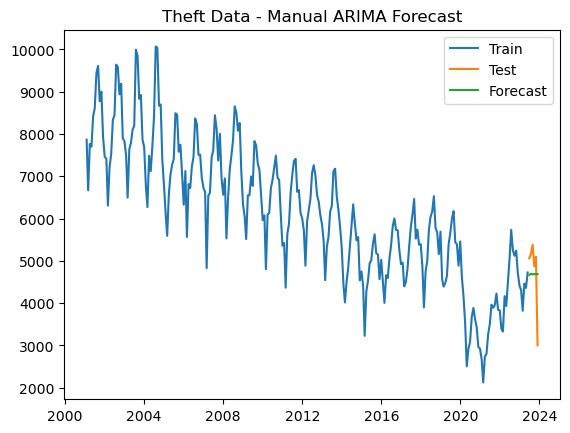

In [77]:
plt.plot(train_theft.index, train_theft, label='Train')
plt.plot(test_theft.index, test_theft, label='Test')
plt.plot(test_theft.index, forecast_theft, label='Forecast')
plt.legend()
plt.title('Theft Data - Manual ARIMA Forecast')
plt.show()

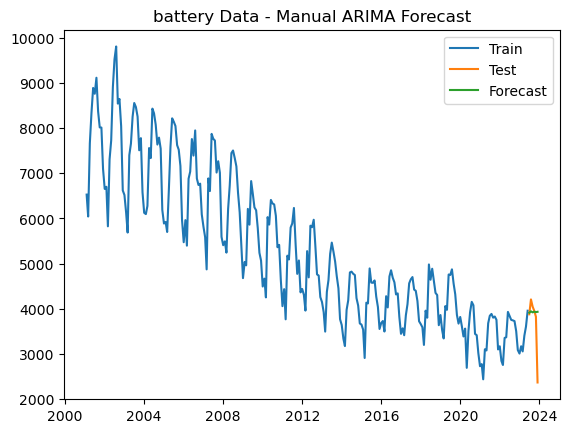

In [78]:
plt.plot(train_battery.index, train_battery, label='Train')
plt.plot(test_battery.index, test_battery, label='Test')
plt.plot(test_battery.index, forecast_battery, label='Forecast')
plt.legend()
plt.title('battery Data - Manual ARIMA Forecast')
plt.show()

### Obtain Metrics for Evaluation

In [79]:
# 'theft'  data
mse_theft = mean_squared_error(test_theft, forecast_theft)
mse_theft

651108.1588754677

In [80]:
#'Battery' data
mse_battery = mean_squared_error(test_battery, forecast_battery)
mse_battery

424140.890843006

### Tune with pmdarima's auto_arima

In [81]:
from pmdarima import auto_arima

In [82]:
#  for theft_data
auto_model_theft = auto_arima(train_theft, seasonal=True, m=12)
auto_model_theft

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [83]:
# for 'Battery' data
auto_model_battery = auto_arima(train_battery, seasonal=True, m=12)
auto_model_battery 

C:\Users\lidiv\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\lidiv\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\lidiv\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\lidiv\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\lidiv\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\lidiv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = s

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

### Fit Model with Best Parameters from auto_arima

In [84]:
#  for theft_data
auto_fit_theft = auto_model_theft.fit(train_theft)
auto_fit_theft


ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [85]:
#  for 'Battery' data
auto_fit_battery = auto_model_battery.fit(train_battery)
auto_fit_battery

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

### Make Forecasts with auto_arima Model

In [86]:
forecast_auto_theft = auto_fit_theft.predict(n_periods=6)  # Forecasting for 6 months
forecast_auto_theft

2023-06-30    5116.914797
2023-07-31    5627.684047
2023-08-31    5497.813682
2023-09-30    5217.100523
2023-10-31    5266.523570
2023-11-30    4794.881622
Freq: M, dtype: float64

In [87]:
#  for 'Battery' data
forecast_auto_battery = auto_fit_battery.predict(n_periods=6)  # Forecasting for 6 months
forecast_auto_battery

2023-06-30    4068.988826
2023-07-31    4120.381089
2023-08-31    4000.680689
2023-09-30    3838.246232
2023-10-31    3685.559960
2023-11-30    3235.290759
Freq: M, dtype: float64

### Plot Forecasts versus Test Data for auto_arima

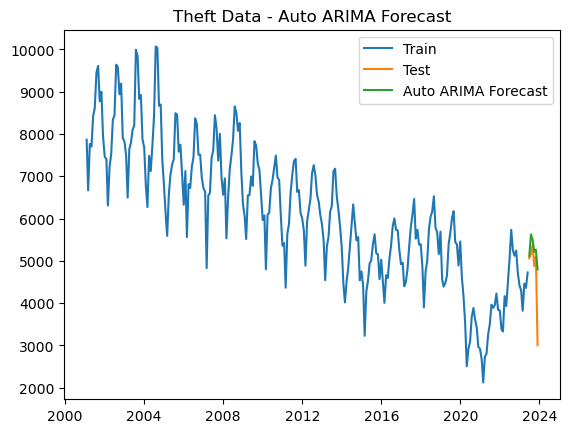

In [88]:
plt.plot(train_theft.index, train_theft, label='Train')
plt.plot(test_theft.index, test_theft, label='Test')
plt.plot(test_theft.index, forecast_auto_theft, label='Auto ARIMA Forecast')
plt.legend()
plt.title('Theft Data - Auto ARIMA Forecast')
plt.show()

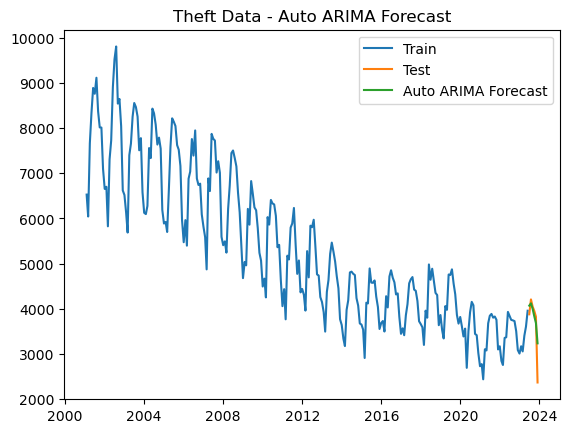

In [89]:
plt.plot(train_battery.index, train_battery, label='Train')
plt.plot(test_battery.index, test_battery, label='Test')
plt.plot(test_battery.index, forecast_auto_battery, label='Auto ARIMA Forecast')
plt.legend()
plt.title('Theft Data - Auto ARIMA Forecast')
plt.show()

### Answering Questions in Markdown

#### theft

In [90]:
# Calculate net change
net_change_theft = forecast_auto_theft[-1] - forecast_auto_theft[0]
net_change_theft

-322.03317497570697

In [91]:
# Calculate percent change
percent_change_theft = (net_change_theft / forecast_auto_theft[0]) * 100
percent_change_theft

-6.2935027789565225

#### battery

In [92]:
# Calculate net change
net_change_battery = forecast_auto_battery[-1] - forecast_auto_battery[0]
net_change_battery

-833.6980660773861

In [93]:
# Calculate percent change
percent_change_battery = (net_change_battery / forecast_auto_battery[0]) * 100
percent_change_battery

-20.489072391590902

#### For Theft:
- Calculate the predicted net change in the number (raw counts) of theft from the beginning of the forecast to the end:  

0.3764233345455098
- Convert the raw delta into a percent change:

-2.7165887239015327e+18%

#### For Battery:
- Calculate the predicted net change in the number (raw counts) of battery from the beginning of the forecast to the end:

0.3262167085314014

- Convert the raw delta into a percent change.

5.5381838380041126e+19%


### Final Evaluation and Recommendations

#### evaluation 

In [94]:
# Check the forecasted counts at the end
final_count_theft = forecast_auto_theft[-1]
final_count_theft 

4794.881622495803

In [95]:
final_count_battery = forecast_auto_battery[-1]

final_count_battery

3235.2907594955636

In [96]:
# Compare and determine which has the highest count
highest_count_crime = 'Theft' if final_count_theft > final_count_battery else 'Battery'
highest_count_crime

'Theft'

In [97]:
# Compare and determine which has the highest net change
highest_net_change_crime = 'Theft' if net_change_theft > net_change_battery else 'Battery'
highest_net_change_crime


'Theft'

In [98]:
# Compare and determine which has the highest percent change
highest_percent_change_crime = 'Theft' if percent_change_theft > percent_change_battery else 'Battery'
highest_percent_change_crime

'Theft'

#### Evaluation:
- Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast? : theft
- Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?: theft
- Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?: theft

#### Recommendations:


- Allocate additional resources and attention to areas and initiatives related to preventing and addressing Theft,

- Keep a close eye on areas and factors contributing to the increase in theft crimes. Explore and implement targeted strategies to address the specific challenges associated with this crime type.